<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Estadística con SciPy

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En esta clase nos vamos a centrar en **cálculos estadísticos**._

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## scipy.stats

Este módulo contiene un gran número de __distribuciones de probabilidad__, tanto continuas como discretas, así como un creciente número de __funciones estadísticas__.

In [2]:
# Importar el módulo entero
import scipy.stats as st
# import scipy as st


In [3]:
# Información
np.info(st)

Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
   dweibull          -- Double

### Funciones

## Distribuciones estadisticas

c:\users\edgardo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


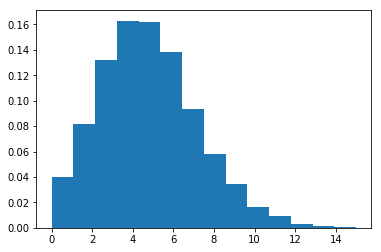

In [4]:
import numpy as np
s = np.random.poisson(5, 10000)

# Display histogram of the sample:
% matplotlib inline
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()



In [5]:
print(count, bins, ignored)

[0.04004    0.08129333 0.13216    0.16286667 0.16202667 0.13813333
 0.0938     0.05824    0.03416    0.01605333 0.00933333 0.00308
 0.00149333 0.00065333] [ 0.          1.07142857  2.14285714  3.21428571  4.28571429  5.35714286
  6.42857143  7.5         8.57142857  9.64285714 10.71428571 11.78571429
 12.85714286 13.92857143 15.        ] <a list of 14 Patch objects>


c:\users\edgardo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


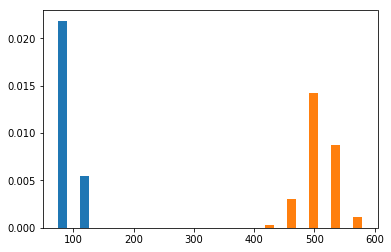

In [6]:
#Draw each 100 values for lambda 100 and 500:

s = np.random.poisson(lam=(100., 500.), size=(100, 2))

count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

### Hagamos una estadística de Poisson

In [7]:
from scipy.stats import poisson
# Calculate a few first moments:
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print(mean, var, skew, kurt)

0.6 0.6 1.2909944487358056 1.6666666666666667


In [8]:
fig, ax = plt.subplots(1, 1)

# Display the probability mass function (pmf):
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

In [9]:
# Generate random numbers:
r = poisson.rvs(mu, size=1000)

In [10]:
count, bins, ignored = plt.hist(r, 14, density=True)
plt.show()

### Hagamos una estadística de Boltzmann

La estadística de Maxwell-Boltzmann es una función estadística desarrollada para modelar el comportamiento de sistemas físicos regidos por la mecánica clásica.  
Esta función estadística clásica, formulada originalmente por los físicos J.C. Maxwell y L. Boltzmann, rige la distribución de un conjunto de partículas en función de los posibles valores de energía de los estados que estas pueden ocupar.  
Para cada sistema termodinámico, la distribución de Maxwell-Boltzmann no es otra cosa que la aplicación del colectivo canónico de la mecánica estadística, bajo el supuesto no-cuántico de que los números de ocupación de cada estado disponible son pequeños comparados con el número máximo de ocupación.

In [11]:
from scipy.stats import boltzmann

In [12]:
lambda_, N = 1.4, 19
mean, var, skew, kurt = boltzmann.stats(lambda_, N, moments='mvsk')
print(mean, var, skew, kurt)

0.3273108178480401 0.4344431884043245 2.5103379528725243 8.301795033427425


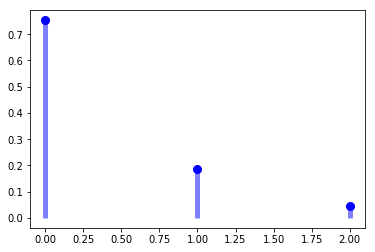

In [13]:
fig, ax = plt.subplots(1, 1)
x = np.arange(boltzmann.ppf(0.01, lambda_, N),
               boltzmann.ppf(0.99, lambda_, N))
ax.plot(x, boltzmann.pmf(x, lambda_, N), 'bo', ms=8, label='boltzmann pmf')
ax.vlines(x, 0, boltzmann.pmf(x, lambda_, N), colors='b', lw=5, alpha=0.5)

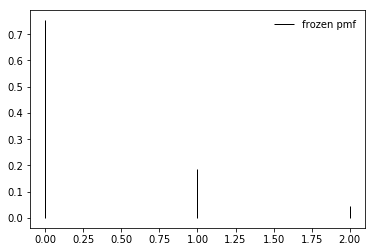

In [14]:
fig, ax = plt.subplots(1, 1)
rv = boltzmann(lambda_, N)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

### Hagamos una estadística de Gauss

In [15]:
from scipy.stats import norm
mu = 34.6
sigma = 10.9
#Calculate a few first moments:
mean, var, skew, kurt = norm.stats(loc=mu, scale=sigma, moments='mvsk')
print(mean, var, skew, kurt)
var, skew, kurt = norm.stats(loc=mu, scale=sigma, moments='vsk')
print(var, skew, kurt)

34.6 118.81 0.0 0.0
118.81 0.0 0.0


In [16]:
mu = 34.6
sigma = 10.9
norm(mu, sigma)
med = norm.median(loc=mu, scale=sigma)  #Median of the distribution.
me = norm.mean(loc=mu, scale=sigma)    #Mean of the distribution.
va = norm.var(loc=mu, scale=sigma)     #Variance of the distribution.
st = norm.std(loc=mu, scale=sigma)     #Standard deviation of the distribution.
print(med, me, va, st)

34.6 34.6 118.81 10.9


### Función Densidad de Probabilidad

In [17]:
mu = 10.0
sigma = 3.5
print(norm.ppf(0.01, mu, sigma))
print(norm.ppf(0.50, mu, sigma))
print(norm.ppf(0.99, mu, sigma))
print(norm.ppf(0.68, mu, sigma))

1.8577824408570578
10.0
18.142217559142942
11.636945796900779


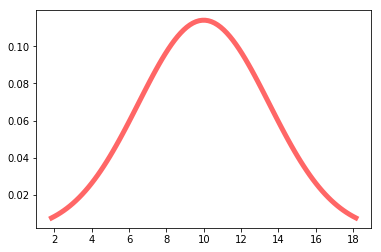

In [18]:
#Display the probability density function (pdf):
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=5, alpha=0.6, label='norm pdf')

In [56]:
datos = np.random.normal(loc=10.0, scale=1.5, size=1000)
# print(datos)

In [57]:
med = np.mean(datos)
des_tip = np.std(datos)
print(med, des_tip)

10.023916013342824 1.4810912570114847


In [58]:
# Distribución normal
dist_normal = st.norm(loc=med, scale=des_tip)
print(dist_normal)

Ahora podemos ver:

* Función densidad de probabilidad (probability density function) `pdf`
* Función de distribución (cumulative distribution function) `cdf`

De esta manera, nos ahorramos definir funciones como:

$$N(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

$$\phi(x)=\intop_{-\infty}^{x}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$$

Para calcular probabilidades $P[a\leq X\leq b]=\intop_{a}^{b}f(x)dx$



In [51]:
# Calculamos la pdf
x = np.linspace(0, 25, 100)
y1 = dist_normal.pdf(x)
# y1

In [52]:
# La representamos
plt.plot(x, y1)
plt.grid(True)

In [53]:
# Calculamos la cdf
y2 = dist_normal.cdf(x)
# y2

In [54]:
# La representamos
plt.plot(x, y2)
plt.grid(True)